<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/PyTorch_Tutorial/2_Dataset%EA%B3%BC_DataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
from torchvision.transforms import ToTensor
from torchvision import datasets

In [10]:
train_data = datasets.FashionMNIST(
    root = 'data',
    train=True,
    download=True,
    transform=ToTensor()
)
test_data = datasets.FashionMNIST(
    root = 'data',
    train=False,
    download=True,
    transform=ToTensor()
)

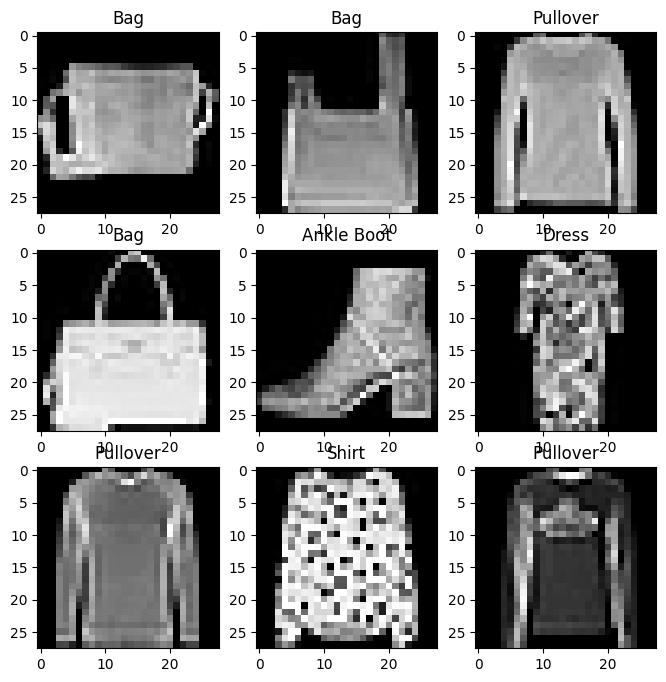

In [14]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(train_data), size=(1,)).item()
  img, label = train_data[sample_idx]

  figure.add_subplot(rows,cols, i)
  plt.title(labels_map[label])
  plt.imshow(img.squeeze(), cmap='gray')


In [15]:
from torch.utils.data import Dataset
import os
import pandas as pd
from torchvision.io import read_image

In [18]:
class CustomImageDataset(Dataset):
  def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    #필요한 객체를 정하는 시작단계. 이 부분은 쓰고자 하는 데이터에 따라서 다 다르다.
    #annotation_file
    #tshirt1.jpg, 0
    #tshirt2.jpg, 0
    #...
    #boot999.jpg, 0

    self.img_labels = pd.read_csv(annotations_file, names=['file_name','label'])
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self): #샘플 개수 반환
    return len(self.img_labels)

  def __getitem__(self, idx): #idx에 해당하는 샘플을 데이터셋에서 불러오고 return
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)

    label = self.img_labels.iloc[idx, 1]

    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)

    return image, label


In [19]:
from torch.utils.data import DataLoader

batch_size = 64
train_dataloader = DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size = batch_size, shuffle=True)

torch.Size([64, 1, 28, 28]) torch.Size([64])


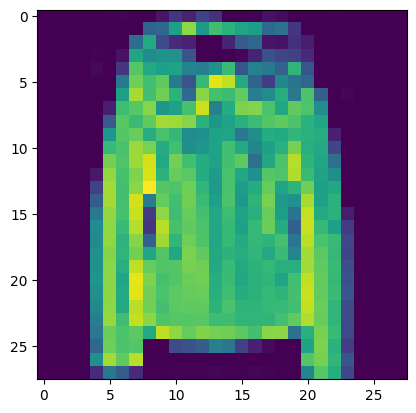

In [41]:
train_features, train_labels = next(iter(train_dataloader))
print(train_features.size(), train_labels.size())

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img)
plt.show()